In [4]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('pollution_no_gas_cleaned.xlsx', engine='openpyxl')

In [6]:

# summarize 'REGULATED INDUSTRY SECTOR'
summary = df['REGULATED INDUSTRY SECTOR'].describe()

print(summary)


count               5987
unique                16
top       water industry
freq                2330
Name: REGULATED INDUSTRY SECTOR, dtype: object


In [7]:
# Frequency of categories of REGULATED INDUSTRY SECTOR
value_counts = df['REGULATED INDUSTRY SECTOR'].value_counts()

# Print the amount of categories of REGULATED INDUSTRY SECTOR
num_unique_values = df['REGULATED INDUSTRY SECTOR'].nunique()
print(f"Number of categories in REGULATED INDUSTRY SECTOR: {num_unique_values}")

# Print all categories
unique_values = df['REGULATED INDUSTRY SECTOR'].unique()
print(f"The categories include: {unique_values}")

# Print the frequency of each category
print(value_counts)

Number of categories in REGULATED INDUSTRY SECTOR: 16
The categories include: ['agriculture' 'biowaste treatment' 'cement and minerals' 'chemicals'
 'combustion' 'efw' 'food & drink' 'waste treatment' 'landfill' 'metals'
 'no far sector' 'nuclear' 'oil and gas' 'paper and textiles'
 'refineries & fuel' 'water industry']
water industry         2330
agriculture            1890
efw                     445
chemicals               277
metals                  190
landfill                169
cement and minerals     163
refineries & fuel       125
combustion              114
food & drink             94
paper and textiles       85
waste treatment          50
biowaste treatment       43
oil and gas               5
no far sector             4
nuclear                   3
Name: REGULATED INDUSTRY SECTOR, dtype: int64


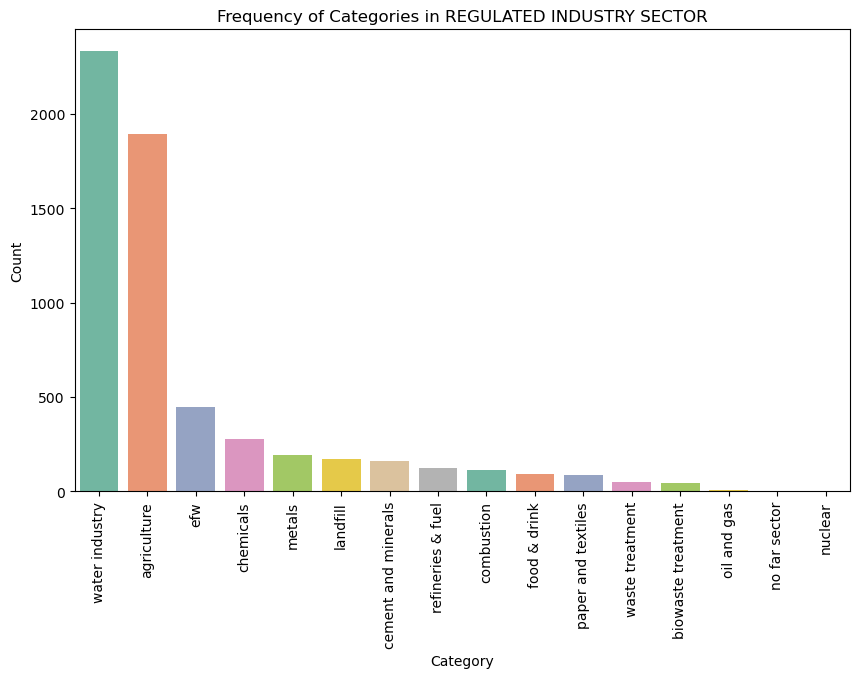

In [8]:
# bar chart for REGULATED INDUSTRY SECTOR
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='Set2')

# set the title and lable
plt.title('Frequency of Categories in REGULATED INDUSTRY SECTOR')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.show()

In [9]:
# Frequency of categories of SUB REGULATED INDUSTRY SECTOR
sub_value_counts = df['REGULATED INDUSTRY SUB SECTOR'].value_counts()

# Print the amount of categories of SUB REGULATED INDUSTRY SECTOR
sub_num_unique_values = df['REGULATED INDUSTRY SUB SECTOR'].nunique()
print(f"Number of categories in REGULATED INDUSTRY SUB SECTOR: {sub_num_unique_values}")

# Print all categories
sub_unique_values = df['REGULATED INDUSTRY SUB SECTOR'].unique()
print(f"The categories include: {sub_unique_values}")

# Print the frequency of each category
print(sub_value_counts)

Number of categories in REGULATED INDUSTRY SUB SECTOR: 29
The categories include: ['Intensive Farming' 'Biowaste Treatment' 'Cement' 'Lime' 'Minerals'
 'Chemicals' 'Power' 'Other' 'EfW' 'Food & Drink' 'Hazardous Waste'
 'Non Hazardous Landfill' 'other' 'Inert Landfill' 'Landfill'
 'Surface treatment' 'Non-Ferrous' 'Ferrous' 'Surface Treatment'
 'Metals Recycling' 'No Far Sector' 'Non-Hazardous & Inert' 'Nuclear'
 'Oil and Gas' 'Textiles' 'Paper & Pulp' 'paper & pulp'
 'Refineries & Fuel' 'Water Industry']
Water Industry            2330
Intensive Farming         1890
EfW                        445
Chemicals                  277
Non Hazardous Landfill     152
Refineries & Fuel          125
Power                      112
Ferrous                    103
Cement                     101
Food & Drink                94
Surface treatment           45
Biowaste Treatment          43
Hazardous Waste             40
Non-Ferrous                 40
Textiles                    40
Paper & Pulp            

In [10]:
# summarize 'REGULATED INDUSTRY SUB SECTOR'
summary = df['REGULATED INDUSTRY SUB SECTOR'].describe()

print(summary)

count               5987
unique                29
top       Water Industry
freq                2330
Name: REGULATED INDUSTRY SUB SECTOR, dtype: object


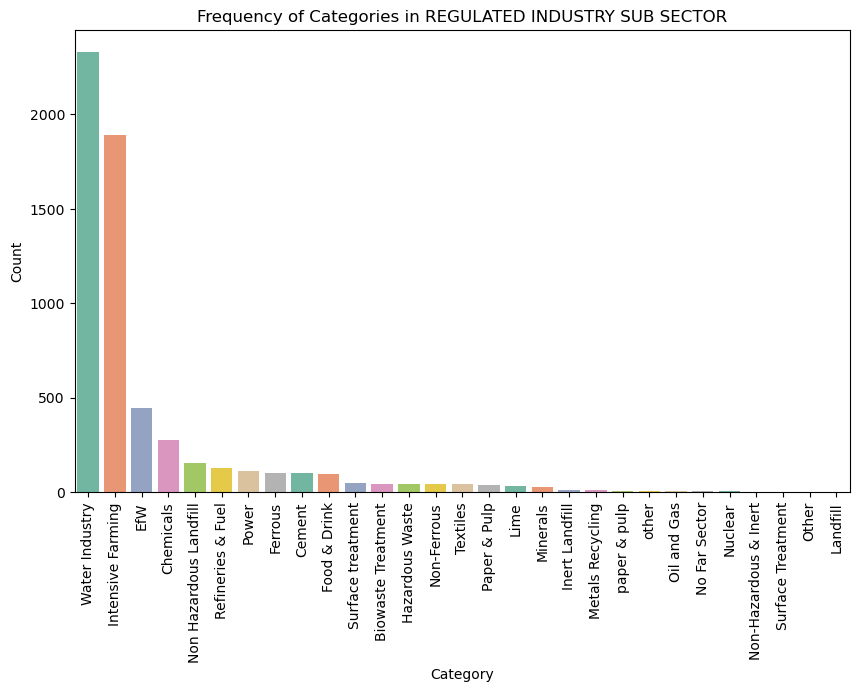

In [11]:
# bar chart for SUB REGULATED INDUSTRY SECTOR
plt.figure(figsize=(10, 6))
sns.barplot(x=sub_value_counts.index, y=sub_value_counts.values, palette='Set2')

# set the title and lable
plt.title('Frequency of Categories in REGULATED INDUSTRY SUB SECTOR')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.show()

In [12]:
# Relationship between REGULATED INDUSTRY SECTOR and REGULATED INDUSTRY SUB SECTOR
# Refine the REGULATED INDUSTRY SECTOR, 
# and analyze the proportion of REGULATED INDUSTRY SUB SECTOR in the corresponding sector
contingency_table = pd.crosstab(df['REGULATED INDUSTRY SECTOR'], df['REGULATED INDUSTRY SUB SECTOR'])

# Print the contigency table
print(contingency_table)


REGULATED INDUSTRY SUB SECTOR  Biowaste Treatment  Cement  Chemicals  EfW  \
REGULATED INDUSTRY SECTOR                                                   
agriculture                                     0       0          0    0   
biowaste treatment                             43       0          0    0   
cement and minerals                             0     101          0    0   
chemicals                                       0       0        277    0   
combustion                                      0       0          0    0   
efw                                             0       0          0  445   
food & drink                                    0       0          0    0   
landfill                                        0       0          0    0   
metals                                          0       0          0    0   
no far sector                                   0       0          0    0   
nuclear                                         0       0          0    0   

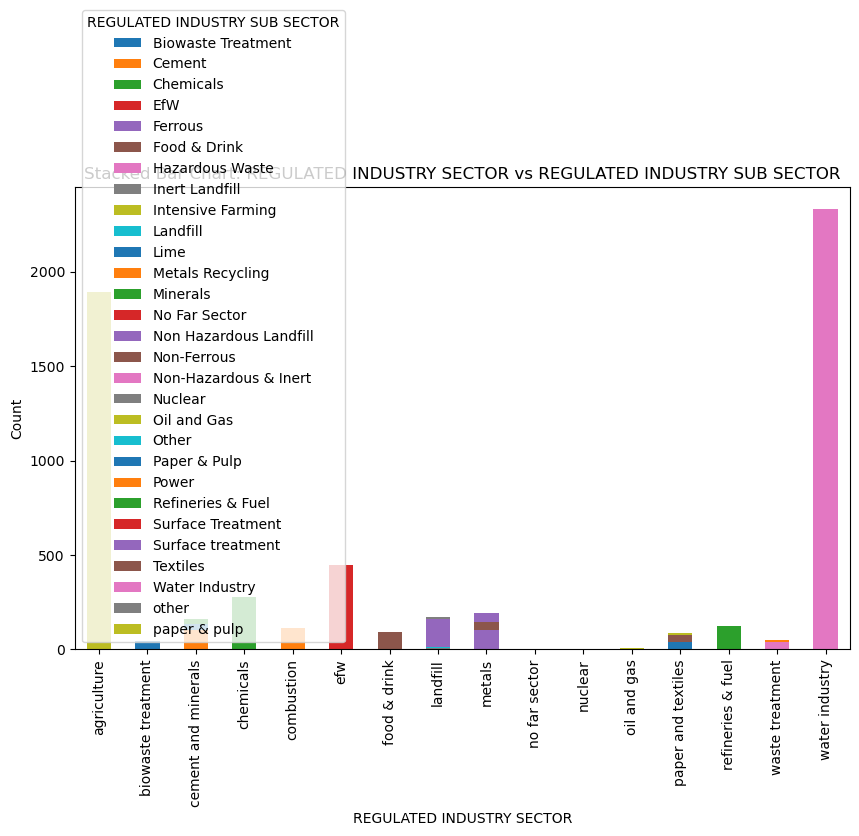

In [13]:
# stacked bar chart for REGULATED INDUSTRY SECTOR vs REGULATED INDUSTRY SUB SECTOR
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Bar Chart: REGULATED INDUSTRY SECTOR vs REGULATED INDUSTRY SUB SECTOR')
plt.xlabel('REGULATED INDUSTRY SECTOR')
plt.ylabel('Count')

plt.show()